In [5]:
import pandas as pd 

In [15]:
df=pd.read_csv('cleaned_daraz_noodles_market.csv')
df.head()

,itemId,items_sold,price,ratingScore,pack_of,weight_per_item,brand,country
0,376184761,76300,374,4.8,8,50.0,Knorr,Germany
1,299804113,371,5599,4.9,40,NaN,ABC,Indonesia
2,439137240,104,300,3.9,1,NaN,Indomie,Indonesia
3,450903836,101,1099,4.5,1,NaN,Samyang,South Korea
4,371826888,943,579,4.5,1,130.0,Samyang,South Korea


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemId           147 non-null    int64  
 1   items_sold       147 non-null    int64  
 2   price            147 non-null    int64  
 3   ratingScore      147 non-null    float64
 4   pack_of          147 non-null    int64  
 5   weight_per_item  92 non-null     float64
 6   brand            147 non-null    object 
 7   country          147 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 9.3+ KB


In [19]:
# Pivot Table 1: Total Sales and Average Rating by Brand
pivot_brand = df.pivot_table(
    index='brand',
    values=['items_sold', 'ratingScore'],
    aggfunc={
        'items_sold': 'sum',  # Total units sold
        'ratingScore': 'mean' # Average rating
    }
).sort_values(by='items_sold', ascending=False).reset_index()

print("Total Sales & Avg. Rating by Brand:")
pivot_brand.round(2)


Total Sales & Avg. Rating by Brand:


,brand,items_sold,ratingScore
0,Knorr,599600,4.78
1,Samyang,29481,4.61
2,Indomie,11678,4.60
3,ABC,8769,4.53
4,Shoop,6900,3.97
5,Nongshim,4481,4.56
6,Noodelite,2900,4.50
7,Every Season,2800,4.50
8,Fruitien,2011,4.83
9,AKHM,619,4.90


In [20]:

# Pivot Table 2: Sales by Country of Origin
pivot_country = df.pivot_table(
    index='country',
    values='items_sold',
    aggfunc='sum'
).sort_values(by='items_sold', ascending=False).reset_index()

print("\nSales by Country of Origin:")
pivot_country




Sales by Country of Origin:


,country,items_sold
0,Germany,599600
1,South Korea,33572
2,Indonesia,20447
3,Pakistan,16246
4,Unknown,1012
5,Thailand,352
6,Singapore,170
7,Japan,164


In [21]:
# Pivot Table 3: Sales by Pack Size (Bulk vs. Single Packs)
pivot_pack = df.pivot_table(
    index='pack_of',
    values='items_sold',
    aggfunc='sum'
).sort_values(by='items_sold', ascending=False).reset_index()

print("\nSales by Pack Size:")
pivot_pack



Sales by Pack Size:


,pack_of,items_sold
0,1,513700
1,8,120500
2,5,12252
3,2,9978
4,3,7003
5,6,2794
6,10,2176
7,12,1459
8,4,1069
9,40,632


In [23]:


# Pivot Table 5: Top Products by Sales Volume
top_products = df.sort_values(by='items_sold', ascending=False).head(10)[
    ['itemId', 'brand', 'items_sold', 'ratingScore', 'pack_of', 'weight_per_item']
]

print("\nTop 10 Products by Sales Volume:")
top_products


Top 10 Products by Sales Volume:


,itemId,brand,items_sold,ratingScore,pack_of,weight_per_item
19,131143717,Knorr,474600,4.8,1,200.0
0,376184761,Knorr,76300,4.8,8,50.0
127,376184868,Knorr,44200,4.8,8,50.0
131,445748109,Knorr,4500,4.7,1,300.0
115,122052781,Nongshim,3200,4.8,1,NaN
18,296209006,Noodelite,2900,4.5,3,65.0
93,449614305,Shoop,2800,3.9,1,140.0
16,296174628,Every Season,2800,4.5,3,60.0
57,113906852,Samyang,2400,4.6,2,NaN
132,449604870,Shoop,2400,4.1,1,140.0


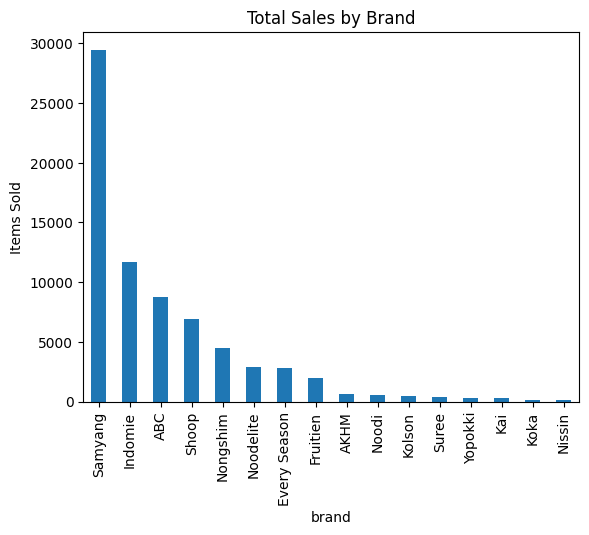

In [34]:
#!pip install matplotlib
import matplotlib.pyplot as plt

pivot_brand[pivot_brand['brand'] != 'Knorr'].plot(kind='bar', x='brand', y='items_sold', legend=False)
plt.title("Total Sales by Brand")
plt.ylabel("Items Sold")
plt.show()

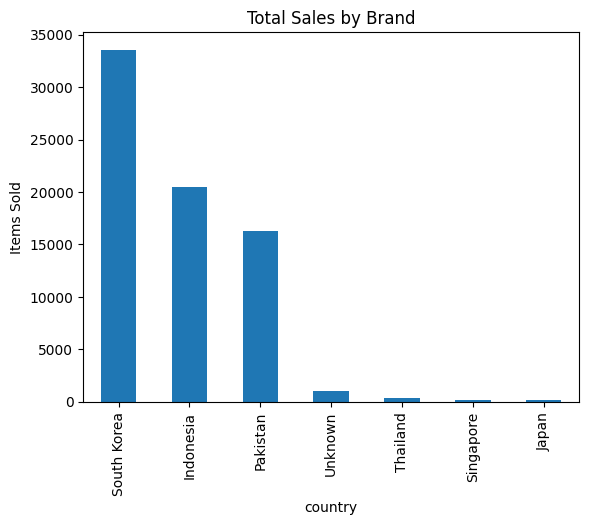

In [36]:
#!pip install matplotlib
import matplotlib.pyplot as plt

pivot_country[pivot_country['country'] != 'Germany'].plot(kind='bar', x='country', y='items_sold', legend=False)
plt.title("Total Sales by Brand")
plt.ylabel("Items Sold")
plt.show()